# Classification Analysis
## Objective: Predict Market Direction (Buy/Sell) using Logistic Regression, SVM & Naive Bayes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('../data/nifty50_2000_2025_11_30.csv', header=[0, 1], index_col=0, parse_dates=True)
df.columns = [col[0] for col in df.columns]

# Feature Engineering: Create Target Variable
# Target = 1 if Close Price > Open Price (Green Candle), else 0 (Red Candle)
df['Target'] = np.where(df['Close'] > df['Open'], 1, 0)

# Features: Daily Return, Gap Up/Down, High-Low Range
df['Daily_Return'] = df['Close'].pct_change()
df['Gap'] = df['Open'] - df['Close'].shift(1)
df['Range'] = df['High'] - df['Low']

df = df.dropna()

X = df[['Daily_Return', 'Gap', 'Range']]
y = df['Target']

print('Class Distribution:\n', y.value_counts())

Class Distribution:
 Target
0    2342
1    2122
Name: count, dtype: int64


In [3]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling (Important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log))
print('\nClassification Report:\n', classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8286674132138858

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       466
           1       0.85      0.77      0.81       427

    accuracy                           0.83       893
   macro avg       0.83      0.83      0.83       893
weighted avg       0.83      0.83      0.83       893



In [5]:
# 2. Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('\nClassification Report:\n', classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8555431131019037

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       466
           1       0.87      0.82      0.84       427

    accuracy                           0.86       893
   macro avg       0.86      0.85      0.85       893
weighted avg       0.86      0.86      0.86       893



In [6]:
# 3. Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)

print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('\nClassification Report (Naive Bayes):\n', classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.812989921612542

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       466
           1       0.85      0.74      0.79       427

    accuracy                           0.81       893
   macro avg       0.82      0.81      0.81       893
weighted avg       0.82      0.81      0.81       893



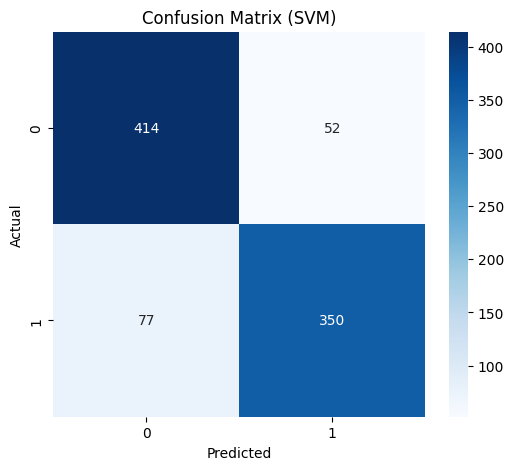

In [7]:
# Confusion Matrix Visualization (SVM)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()